In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

# Set the font family to Cmr10
plt.rcParams['font.family'] = 'Cmr10'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cmr10'
plt.rcParams['mathtext.it'] = 'Cmr10:italic'
plt.rcParams['mathtext.bf'] = 'Cmr10:bold'

plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

In [2]:
x_data = np.array([10, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 50, 60, 65, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])
above_data = np.array([2.087, 2.048, 2.002, 1.995, 1.989, 1.985, 1.981, 1.976, 1.972, 1.968, 1.964, 1.962, 1.961, 1.946, 1.951, 1.969, 1.981, 2.006, 2.013, 2.017, 2.021, 2.025, 2.029, 2.036, 2.041, 2.047, 2.050, 2.079])
below_data = np.array([2.032, 2.018, 2.004, 2.001, 1.997, 1.995, 1.992, 1.990, 1.985, 1.983, 1.982, 1.981, 1.980, 1.965, 1.975, 1.984, 1.992, 2.003, 2.010, 2.012, 2.014, 2.018, 2.021, 2.025, 2.027, 2.031, 2.034, 2.045])

df = pd.DataFrame({'distance': x_data, 'P1': above_data, 'P2': below_data})

df.to_excel('LinearPenData.xlsx', index=False)

In [3]:
df = pd.read_excel('LinearPenData.xlsx')

df.distance = df.distance / 100

df.head()

,distance,P1,P2
0,0.10,2.087,2.032
1,0.15,2.048,2.018
2,0.20,2.002,2.004
3,0.21,1.995,2.001
4,0.22,1.989,1.997


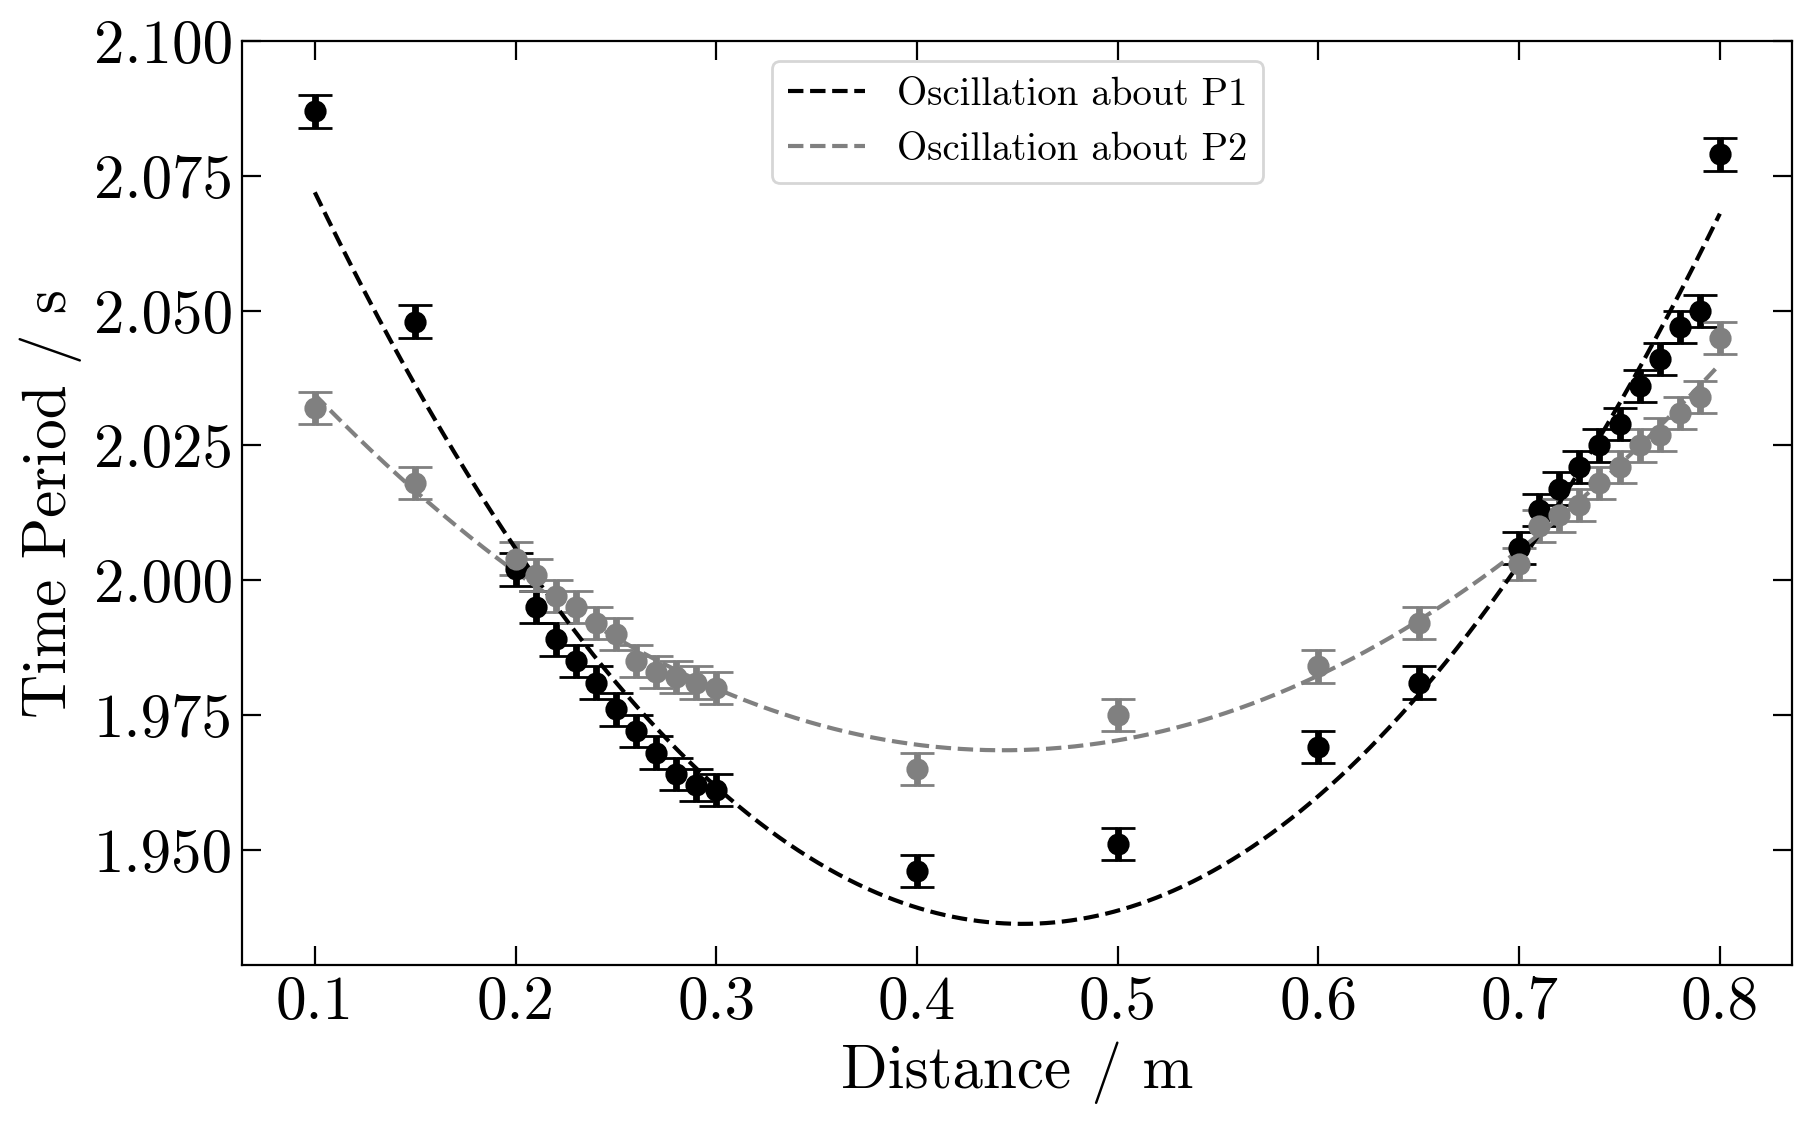

In [4]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

ax.errorbar(df.distance,
            df.P1,
            xerr = 0.001,
            yerr = 0.003,
            marker='o',
            markersize=7,
            color='black',
            ecolor='black',
            markerfacecolor='black',
            linestyle='none',
            capsize=6
            )

ax.errorbar(df.distance,
            df.P2,
            xerr = 0.001,
            yerr = 0.003,
            marker='o',
            markersize=7,
            color='grey',
            ecolor='grey',
            markerfacecolor='grey',
            linestyle='none',
            capsize=6
            )

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(quadratic, df.distance, df.P1)
a = popt[0]
b = popt[1]
c = popt[2]
err_a = np.sqrt(float(pcov[0][0]))
err_b = np.sqrt(float(pcov[1][1]))
err_c = np.sqrt(float(pcov[2][2]))

x_values = np.linspace(min(df.distance), max(df.distance), 1000)

plt.plot(x_values, quadratic(x_values, a, b, c), linestyle='--', color='black', label='Oscillation about P1')

popt, pcov = curve_fit(quadratic, df.distance, df.P2)
x = popt[0]
y = popt[1]
z = popt[2]
err_x = np.sqrt(float(pcov[0][0]))
err_y = np.sqrt(float(pcov[1][1]))
err_z = np.sqrt(float(pcov[2][2]))

plt.plot(x_values, quadratic(x_values, x, y, z), linestyle='--', color='grey', label='Oscillation about P2')

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
               )

plt.legend(fontsize = 14, loc='upper center') 
plt.xlabel('Distance / m')
plt.ylabel('Time Period / s')
plt.ylim(None, 2.1)

plt.show()

In [5]:
fig.savefig('figures/LPgraph.png', dpi=300)

In [6]:
x1 = (y-b + np.sqrt((b-y)**2 - 4*(a-x)*(c-z))) / (2*(a-x))
y1 = quadratic(x1, a, b, c)

x2 = (y-b - np.sqrt((b-y)**2 - 4*(a-x)*(c-z))) / (2*(a-x))
y2 = quadratic(x2, a, b, c)
      
print(f'({x1}, {y1})')
print(f'({x2}, {y2})')

T = (y1 + y2)/2

g = 0.996/(T/(2*np.pi))**2

print(g)

(0.7098039810048273, 2.0084599729316905)
(0.21604705546070088, 1.997312587831332)
9.80181478398583


In [7]:
d = a - x
err_d = np.sqrt(err_a**2 + err_x**2)

e = b - y
err_e = np.sqrt(err_b**2 + err_y**2)

f = c - z
err_f = np.sqrt(err_c**2 + err_z**2)

In [8]:
der_x1d = -(np.sqrt(e**2-4*f*d))/(2*d**2)-(f)/(d*np.sqrt(e**2-4*f*d))+(e)/(2*d**2)

der_x1e = -(1)/(2*d)+(e)/(2*d*np.sqrt(e**2-4*d*f))

der_x1f = -(1)/(np.sqrt(e**2-4*f*d))

In [9]:
err_x1 = np.sqrt((der_x1d * err_d)**2+(der_x1e * err_e)**2+(der_x1f * err_f)**2)

print(f'x1 = {x1} +- {err_x1}')

x1 = 0.7098039810048273 +- 0.14980758240148104


In [10]:
der_x2d = (np.sqrt(e**2-4*f*d))/(2*d**2)+(f)/(d*np.sqrt(e**2-4*f*d))+(e)/(2*d**2)

der_x2e = -(1)/(2*d)-(e)/(2*d*np.sqrt(e**2-4*d*f))

der_x2f = (1)/(np.sqrt(e**2-4*f*d))

In [11]:
err_x2 = np.sqrt((der_x2d * err_d)**2+(der_x2e * err_e)**2+(der_x2f * err_f)**2)

print(f'x2 = {x2} +- {err_x2}')

x2 = 0.21604705546070088 +- 0.04842328180018748


In [12]:
der_x1a = x1**2

der_x1b = 1

der_x1c = 1

der_x1x1 = 2*a*x1

In [13]:
err_y1 = np.sqrt((der_x1a*err_a)**2+(der_x1b*err_b)**2+(der_x1c*err_c)**2+(der_x1x1*err_x1)**2)

print(f'y1 = {y1} +- {err_y1}')

y1 = 2.0084599729316905 +- 0.23707301924152419


In [14]:
der_x2a = x2**2

der_x2b = 1

der_x2c = 1

der_x2x2 = 2*a*x2

In [15]:
err_y2 = np.sqrt((der_x2a*err_a)**2+(der_x2b*err_b)**2+(der_x2c*err_c)**2+(der_x2x2*err_x2)**2)

print(f'y1 = {y2} +- {err_y2}')

y1 = 1.997312587831332 +- 0.0481847937580065


In [16]:
err_T = np.sqrt((0.5*err_y1)**2+(0.5*err_y2)**2)

print(f'T = {T} +- {err_T}')

T = 2.002886280381511 +- 0.12096010788871027


In [17]:
L = 0.996
err_L = 0.001

err_g = 4*np.pi**2*np.sqrt((1/T**2*err_L)**2+(2*L/T**3*err_T)**2)

print(f'g = {g} +- {err_g}')

g = 9.80181478398583 +- 1.1839609122743744


In [18]:
diff = abs(df.P1 - df.P2)
minimum = min(diff)
print(diff)        

0     0.055
1     0.030
2     0.002
3     0.006
4     0.008
5     0.010
6     0.011
7     0.014
8     0.013
9     0.015
10    0.018
11    0.019
12    0.019
13    0.019
14    0.024
15    0.015
16    0.011
17    0.003
18    0.003
19    0.005
20    0.007
21    0.007
22    0.008
23    0.011
24    0.014
25    0.016
26    0.016
27    0.034
dtype: float64


In [19]:
L = 1.672 # Length of rod
P_1, P_2 = 0.338, 1.3324 # Positions of the knife edges

m1, x_1 = 1.26105, L/2 # Mass of the rod and its centre of mass
m2, x_2 = 1.00256, 0.088 # Mass of the first disk and its centre of mass
m3, x_3 = 1.4048, df.distance[2]+P_1 # Mass of the second disk and its centre of mass

M = m1 + m2 + m3 # Total mass

C_of_M = (m1 * x_1 + m2 * x_2 + m3 * x_3) / M # centre of mass


h1, h2 = C_of_M - P_1, P_2 - C_of_M # distances between the centre of mass and the knife edges

T1 = df.P1[2]
T2 = df.P2[2]

T = np.sqrt((T1**2 + T2**2)/(2)+(T1**2 - T2**2)/(2)*((h1+h2)/(h1-h2)))

print(T)

2.0045644267250293


In [20]:
err_T1 = 0.003
err_T2 = 0.003

err_L = np.sqrt(0.001**2+0.002**2)
err_P1 = 0.001
err_P2 = 0.002
err_m = 0.00001
err_M = 0.00003
err_x_1 = err_L/2
err_x_2 = 0.001
err_x_3 = 0.002

err_CofM = 1/M*np.sqrt((x_1*err_m)**2+(x_2*err_m)**2+(x_3*err_m)**2+(m1*err_x_1)**2+(m2*err_x_2)**2+(m3*err_x_3)**2+(C_of_M*err_M)**2)

err_h1 = np.sqrt((err_P1)**2+(err_CofM)**2)
err_h2 = np.sqrt((err_P2)**2+(err_CofM)**2)

In [21]:
#for T^2

err_Tsq = np.sqrt(((-2*h1*T1)/(h2-h1)*err_T1)**2+((2*h2*T2)/(h2-h1)*err_T2)**2+((h2*(T2**2-T1**2))/(h1-h2)**2*err_h1)**2+((-h1*(T2**2-T1**2))/(h2-h1)**2*err_h2)**2)

err_T = (T**2)**(-1.5)/2*err_Tsq

print(f'T = {T} +- {err_T}')

T = 2.0045644267250293 +- 0.0009800389588419211


In [22]:
g = 0.996/(T/(2*np.pi))**2

err_g = 4*np.pi**2*np.sqrt((1/T**2*err_L)**2+(2*L/T**3*err_T)**2)

print(f'g = {g} +- {err_g}')

g = 9.785410228235907 +- 0.027214405568955224
